# Presentation in which we do some predictive modeling with _____ model/algorithm or whatever

STEPS
- Introduce the dataset
- Do basic EDA (distributions, make some cool graphs, maybe check for diff in means for teh periods, CLUSTERING!)
- Develop Predictive Model (try a few?)
- Defend our methods

In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as sms
import xgboost as xgb


## Describing The Dataset



Variables: 
- work_year (int)
- experience_level (str)
- employment_type (str)
- job_title (str)
- salary (int)
- salary_currency (str)
- salaryinusd (int)
- employee_residence (str)
- remote_ratio (int)
- company_location (str)
- company_size (str)


Target Variable: salary


In [70]:
# read in the data from ./data/presentation_nov_3.txt
df = pd.read_csv('data/presentation_nov_3/ds_salaries.csv', sep=',')
#drop the first index column
df = df.drop(df.columns[0], axis=1)
#drop the salary column (since salary is better and seems more accurate)
df = df.drop('salary', axis=1)
#convert the remote_ratio column to be categorical, 0 -> 'none', 50 -> 'part', 100 -> 'full'
df['remote_ratio'] = df['remote_ratio'].replace([0, 50, 100], ['none', 'part', 'full'])
#convert the employment_type column to be categorical, 'FT' -> 'full_time', 'PT' -> 'part_time', 'CT' -> 'contract', 'FL' -> 'freelance'
df['employment_type'] = df['employment_type'].replace(['FT', 'PT', 'CT', 'FL'], ['full_time', 'part_time', 'contract', 'freelance'])
#convert the experience_level column to be categorical, 'EN' -> 'entry_level', 'MI' -> 'mid_level', 'SE' -> 'senior_level', 'EX' -> 'executive_level'
df['experience_level'] = df['experience_level'].replace(['EN', 'MI', 'SE', 'EX'], ['entry_level', 'mid_level', 'senior_level', 'executive_level'])
df.head(6)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,mid_level,full_time,Data Scientist,EUR,79833,DE,none,DE,L
1,2020,senior_level,full_time,Machine Learning Scientist,USD,260000,JP,none,JP,S
2,2020,senior_level,full_time,Big Data Engineer,GBP,109024,GB,part,GB,M
3,2020,mid_level,full_time,Product Data Analyst,USD,20000,HN,none,HN,S
4,2020,senior_level,full_time,Machine Learning Engineer,USD,150000,US,part,US,L
5,2020,entry_level,full_time,Data Analyst,USD,72000,US,full,US,L


In [71]:
# check for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

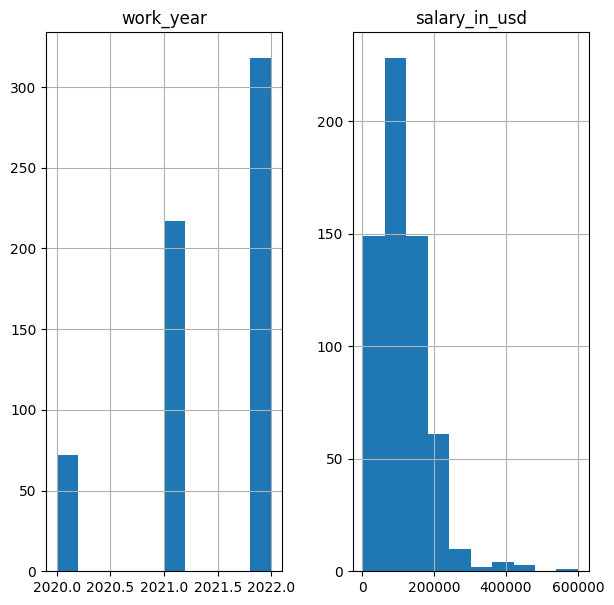

In [72]:
df.hist(figsize=(7,7))
plt.show()

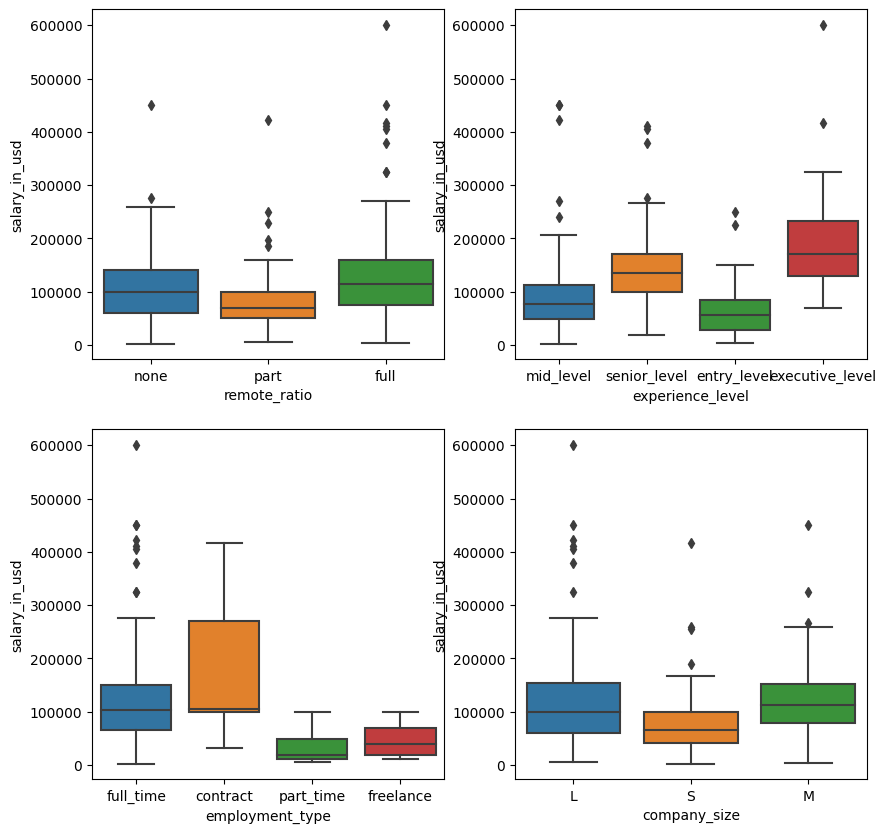

In [73]:
#boxplot of salary_in_usd by categorical variables
fig, ax = plt.subplots(2, 2, figsize=(10,10))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df, ax=ax[0,0])
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, ax=ax[0,1])
sns.boxplot(x='employment_type', y='salary_in_usd', data=df, ax=ax[1,0])
sns.boxplot(x='company_size', y='salary_in_usd', data=df, ax=ax[1,1])
plt.show()

<AxesSubplot: xlabel='company_size', ylabel='count'>

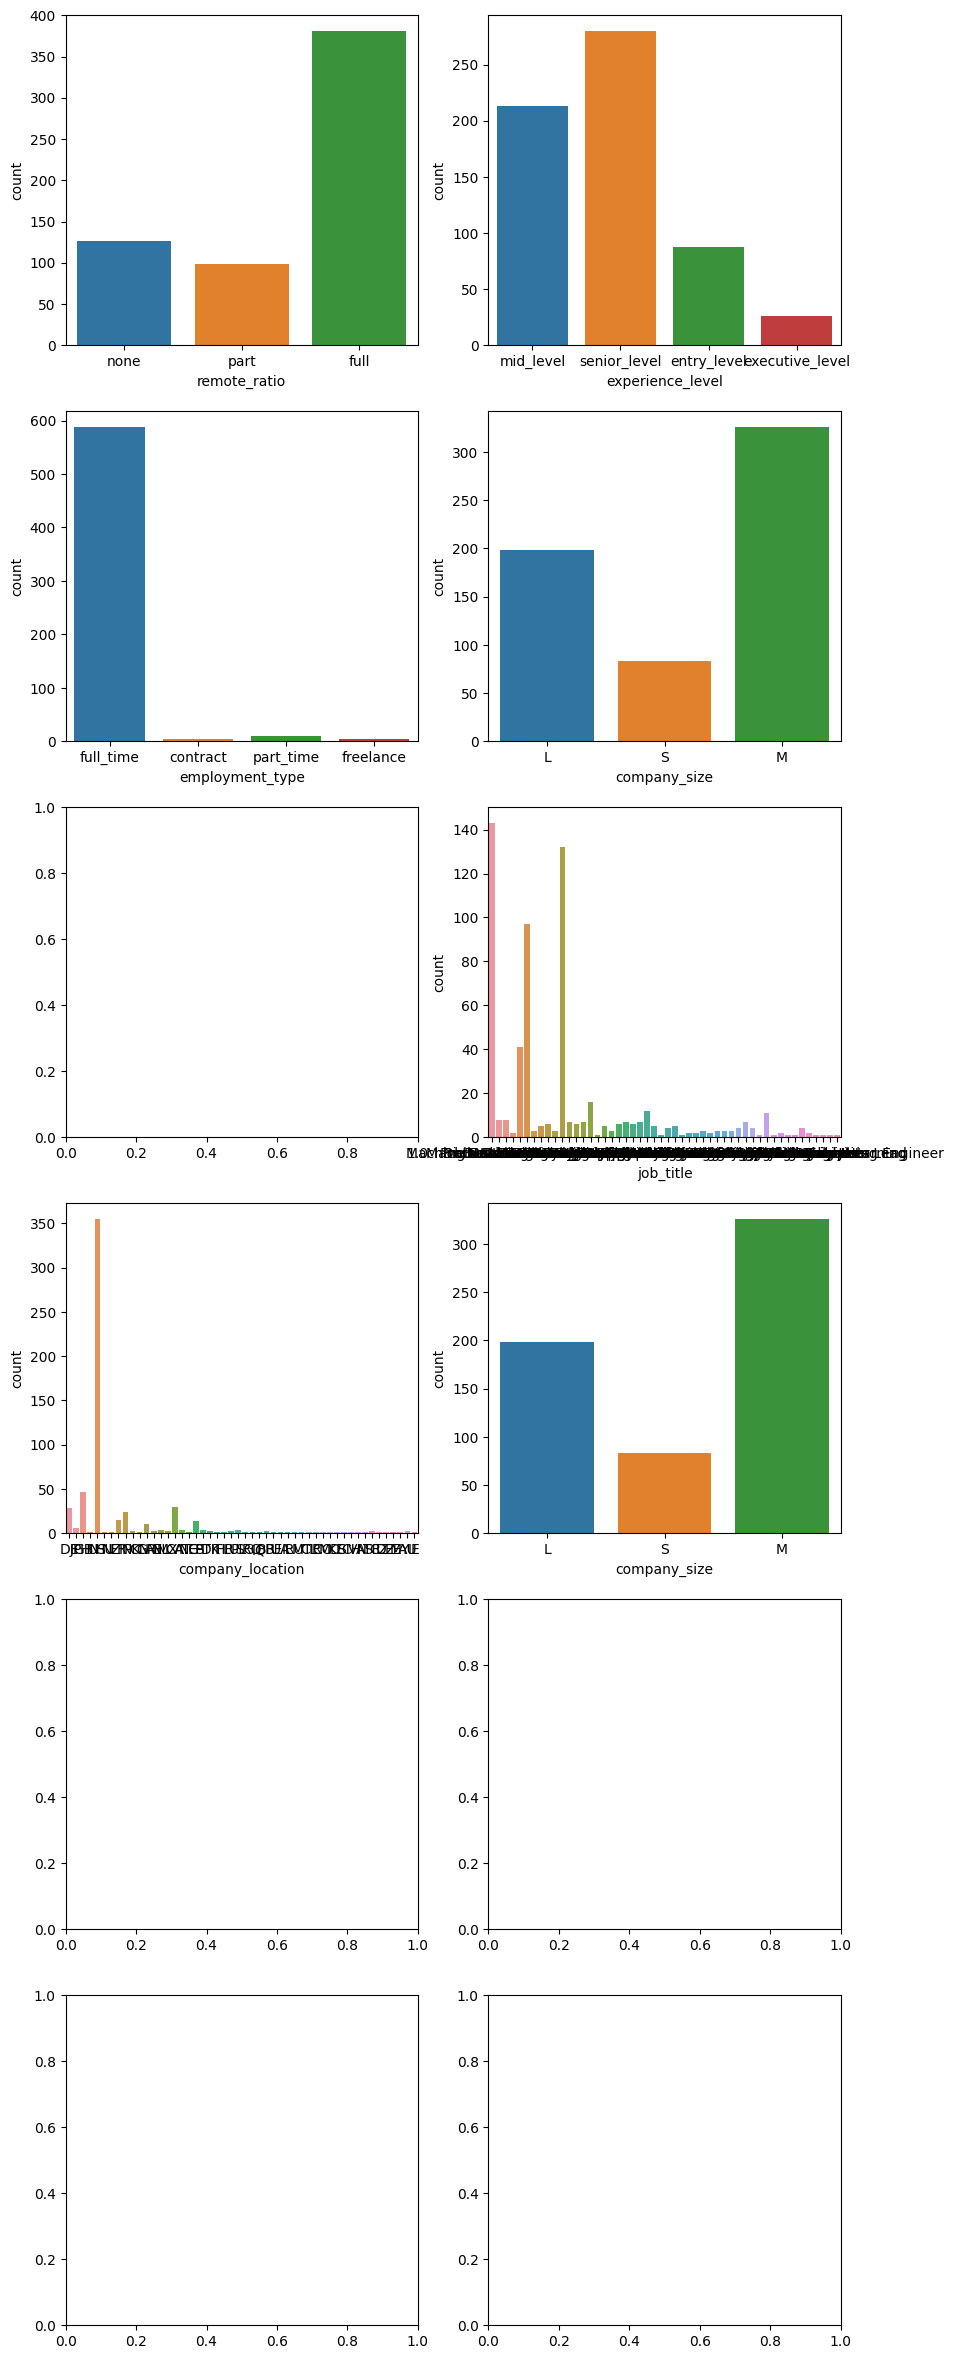

In [91]:
# work_year             0
# experience_level      0
# employment_type       0
# job_title             0
# salary_currency       0
# salary_in_usd         0
# employee_residence    0
# remote_ratio          0
# company_location      0
# company_size          0

#show the ratio of each category in the categorical variables
fig, ax = plt.subplots(6, 2, figsize=(10,30))
sns.countplot(x='remote_ratio', data=df, ax=ax[0,0])
sns.countplot(x='experience_level', data=df, ax=ax[0,1])
sns.countplot(x='employment_type', data=df, ax=ax[1,0])
sns.countplot(x='company_size', data=df, ax=ax[1,1])
sns.countplot(x='job_title', data=df, ax=ax[2,1])
sns.countplot(x='company_location', data=df, ax=ax[3,0])
sns.countplot(x='company_size', data=df, ax=ax[3,1])




<AxesSubplot: >

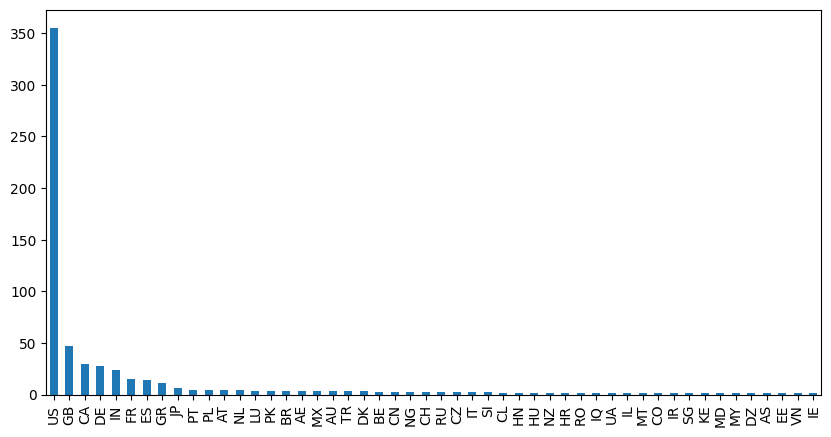

In [74]:
#show number of employees per company_location in a sorted bar graph 
df['company_location'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))



In [75]:
# # use np.unique to convert the categorical variables to numerical variables
# numerical_df = df.copy()
# for col in df.columns:
#     numerical_df[col] = np.unique(df[col], return_inverse=True)[1]
# numerical_df.head(6)

In [77]:
# getting dummy variables for categorical variables for prediction



# Creating predictive models
1. XGBoost
2. 

In [80]:
numerical_df = pd.get_dummies(df)
#normalize the numerical_df
numerical_df = (numerical_df - numerical_df.mean()) / numerical_df.std()


# #split the data into training and testing sets
X = numerical_df.drop('salary_in_usd', axis=1)
y = numerical_df['salary_in_usd']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #fit an xgboost model to the training data with early_stopping_rounds
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, )
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# #make predictions on the test data
predictions = xgb_model.predict(X_test)

# #calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(predictions, y_test)
print("Mean Absolute Error: " + str(mae))

# #calculate the R^2 score
from sklearn.metrics import r2_score
r2 = r2_score(predictions, y_test)
print("R^2 Score: " + str(r2))


Mean Absolute Error: 0.36478264706382874
R^2 Score: 0.30408509663407324
